# Capstone Project Flask UI

Pada capstone ini anda diminta untuk membangun sebuah Flask UI sederhana yang berisi beberapa tampilan plot dari skeleton yang sudah disediakan dan satu plot tambahan berdasarkan analisis anda.

File ini dapat dimanfaatkan untuk membantu anda dalam proses wrangling dan visualization. Apabila proses wrangling sudah tepat dan hasil visualisasi sudah sesuai dengan ketentuan, anda dapat memindahkan kembali kode program yang sudah anda lengkapi ke dalam file `app.py`.

## Create Virtual Enviroment 

a. Created virtual environment called "capstone-flask"

Hal pertama yang harus dilakukan adalah melakukan pengaturan environment conda. Untuk menyiapkan conda environment dan kernel, silahkan gunakan command berikut:

```
conda create -n <ENV_NAME> python=3.10
conda activate <ENV_NAME>

conda install ipykernel
python -m ipykernel install --user --name <ENV_NAME>
```

b. Install packages: pandas, flask, matplotlib, dan numpy

Seluruh dependecies telah di-export ke dalam file requirements.txt. Oleh karena itu untuk melakukan install packages, Anda dapat menggunakan perintah berikut:

```
pip install -r requirements.txt --user
```

## Data Preprocessing

**Import library**

In [1]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

**Load data**

Bacalah file `googleplaystore.csv` data dan simpan ke objek dataframe dengan nama playstore

In [2]:
playstore = pd.read_csv('data/googleplaystore.csv')
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**Data Cleansing** 

**_Task 1:_** Hapus data yang duplikat berdasarkan kolom App, dengan tetap keep data pertama (hint : gunakan parameter subset)

In [4]:
#saya ingin tahu dulu kenapa di bawah minta hapus data 10472 dihapus?
print(playstore.iloc[10472:10473])

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  


In [5]:
#cek data duplikat
duplicate_apps = playstore[playstore.duplicated(subset="App")]
print("Jumlah baris duplikat:", len(duplicate_apps))

Jumlah baris duplikat: 1181


In [6]:
#lakukan penghapusan
rows_before = len(playstore)
playstore.drop_duplicates(subset="App", keep="first", inplace=True)
rows_after = len(playstore)
print("Jumlah baris sebelum penghapusan:", rows_before)
print("Jumlah baris setelah penghapusan:", rows_after)
print("Jumlah baris dihapus/duplikat:", rows_after - rows_before)

Jumlah baris sebelum penghapusan: 10841
Jumlah baris setelah penghapusan: 9660
Jumlah baris dihapus/duplikat: -1181


Bagian ini untuk menghapus row 10472 karena nilai data tersebut tidak tersimpan pada kolom yang benar

In [7]:
playstore.drop([10472], inplace=True)

**_Task 2:_** Cek tipe data kolom Category. Jika masih tersimpan dengan format tipe data yang salah, ubah ke tipe data yang sesuai


In [8]:
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
# Sebelum ubah tipe data, saya ingin tahu dulu, kolom "Category" isinya apa aja
# Menampilkan jumlah unik nilai di kolom "Category"
unique_category_count = playstore["Category"].nunique()
print("Jumlah unik nilai di kolom Category:", unique_category_count)

# Menampilkan daftar nilai unik di kolom "Category"
unique_categories = playstore["Category"].unique()
print("Daftar unik nilai di kolom Category:")
print(unique_categories)


Jumlah unik nilai di kolom Category: 33
Daftar unik nilai di kolom Category:
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [11]:
# Mengubah tipe data kolom "Category" menjadi category
#playstore["Category"] = playstore["Category"].astype("category")
playstore.Category = playstore.Category.astype("category")
print(playstore["Category"].dtype)

category


**_Task 3:_** Pada kolom Installs Buang tanda koma(,) dan tanda tambah(+) kemudian ubah tipe data menjadi integer

In [12]:
# Menghapus tanda koma (,) dan tanda tambah (+) dari kolom "Installs"
#playstore['Installs'] = playstore['Installs'].str.replace(',', '')
#playstore['Installs'] = playstore['Installs'].str.replace('+', '')

playstore.Installs = playstore.Installs.apply(lambda x: x.replace(',', ''))
playstore.Installs = playstore.Installs.apply(lambda x: x.replace('+', ''))

playstore.Installs = playstore.Installs.astype(int)
playstore.dtypes


App                 object
Category          category
Rating             float64
Reviews             object
Size                object
Installs             int32
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [13]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Bagian ini untuk merapikan kolom Size, Anda tidak perlu mengubah apapun di bagian ini

In [14]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)


**_Task 4:_** Pada kolom Price, buang karakater $ pada nilai Price lalu ubah tipe datanya menjadi float

In [15]:
#cek dulu isinya
unique_prices = playstore['Price'].unique()
print(unique_prices)

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' '$1.20'
 '$1.04']


In [16]:
#playstore['Price'] = playstore['Price'].apply(lambda x: x.replace('$', ''))
#playstore['Price'] = playstore['Price'].astype(float)

playstore.Price = playstore.Price.apply(lambda x: x.replace('$', ''))
playstore.Price = playstore.Price.astype(float)

In [17]:
#cek lagi isinya
unique_prices = playstore['Price'].unique()
print(unique_prices)

[  0.     4.99   3.99   6.99   1.49   2.99   7.99   5.99   3.49   1.99
   9.99   7.49   0.99   9.     5.49  10.    24.99  11.99  79.99  16.99
  14.99   1.    29.99  12.99   2.49  10.99   1.5   19.99  15.99  33.99
  74.99  39.99   3.95   4.49   1.7    8.99   2.     3.88  25.99 399.99
  17.99 400.     3.02   1.76   4.84   4.77   1.61   2.5    1.59   6.49
   1.29   5.    13.99 299.99 379.99  37.99  18.99 389.99  19.9    8.49
   1.75  14.     4.85  46.99 109.99 154.99   3.08   2.59   4.8    1.96
  19.4    3.9    4.59  15.46   3.04   4.29   2.6    3.28   4.6   28.99
   2.95   2.9    1.97 200.    89.99   2.56  30.99   3.61 394.99   1.26
   1.2    1.04]


In [18]:
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews             object
Size               float64
Installs             int32
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

Ubah tipe data Reviews, Size, Installs ke dalam tipe data integer

In [19]:
#cek isi
unique_reviews = playstore['Reviews'].unique()
print("unique_reviews:", unique_reviews)
unique_sizes = playstore['Size'].unique()
print("unique_sizes:", unique_sizes)
unique_installs = playstore['Installs'].unique()
print("unique_installs:", unique_installs)


unique_reviews: ['159' '967' '87510' ... '603' '1195' '398307']
unique_sizes: [1.90000000e+07 1.40000000e+07 8.70000000e+06 2.50000000e+07
 2.80000000e+06 5.60000000e+06 2.90000000e+07 3.30000000e+07
 3.10000000e+06 2.80000000e+07 1.20000000e+07 2.00000000e+07
 2.10000000e+07 3.70000000e+07 2.70000000e+06 5.50000000e+06
 1.70000000e+07 3.90000000e+07 3.10000000e+07 4.20000000e+06
 7.00000000e+06 2.30000000e+07 6.00000000e+06 6.10000000e+06
 4.60000000e+06 9.20000000e+06 5.20000000e+06 1.10000000e+07
 2.40000000e+07 1.23709677e+07 9.40000000e+06 1.50000000e+07
 1.00000000e+07 1.20000000e+06 2.60000000e+07 8.00000000e+06
 7.90000000e+06 5.60000000e+07 5.70000000e+07 2.00371467e+07
 3.50000000e+07 5.40000000e+07 2.01000000e+05 3.60000000e+06
 5.70000000e+06 8.60000000e+06 2.40000000e+06 2.70000000e+07
 2.50000000e+06 1.60000000e+07 3.40000000e+06 8.90000000e+06
 3.90000000e+06 2.90000000e+06 3.80000000e+07 3.20000000e+07
 5.40000000e+06 1.80000000e+07 1.10000000e+06 2.20000000e+06
 4.5000

In [20]:
print("sebelum:", playstore.dtypes)
playstore['Reviews'] = playstore['Reviews'].astype(int)
playstore['Size'] = playstore['Size'].astype(int)
playstore['Installs'] = playstore['Installs'].astype(int)
print("sesudah:", playstore.dtypes)

sebelum: App                 object
Category          category
Rating             float64
Reviews             object
Size               float64
Installs             int32
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object
sesudah: App                 object
Category          category
Rating             float64
Reviews              int32
Size                 int32
Installs             int32
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object


## Data Wrangling

In [21]:
df2 = playstore.copy()

**_Task 5:_** Dataframe top_category dibuat untuk menyimpan frekuensi aplikasi untuk setiap Category. 
Gunakan crosstab untuk menghitung frekuensi aplikasi di setiap category kemudian gunakan `Jumlah`
sebagai nama kolom dan urutkan nilai frekuensi dari nilai yang paling banyak. Terakhir reset index dari dataframe top_category.

In [22]:
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
top_category = pd.crosstab(index=playstore['Category'], columns='Jumlah').sort_values(by='Jumlah', ascending=False)

In [24]:
top_category.reset_index(inplace=True)
top_category.head()

col_0,Category,Jumlah
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395


In [25]:
category_values = top_category.index.tolist()
print(category_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


**_Task 6:_** Ini adalah bagian untuk melengkapi konten value box 
most category mengambil nama category paling banyak mengacu pada dataframe `top_category`
total mengambil frekuensi/jumlah category paling banyak mengacu pada dataframe `top_category`

In [26]:
#most_categories = top_category['Category'][0] <-- ini menghasilkan error, tapi mengapa?
#most_categories = top_category.index[0]
most_categories = top_category['Category'].iloc[0]
total = top_category['Jumlah'][0]

print("Kategori paling banyak aplikasi:", most_categories)
print("Total aplikasi dalam kategori tersebut:", total)

Kategori paling banyak aplikasi: FAMILY
Total aplikasi dalam kategori tersebut: 1832


In [27]:
# masih bingung mengapa kode ini error --> most_categories = top_category['Category'][0] 
print("nomor 2", top_category.index[1])
print("nomor 3", top_category.index[2])
print("nomor 4", top_category.index[3])

nomor 2 1
nomor 3 2
nomor 4 3


`rev_table` adalah tabel yang berisi 10 aplikasi yang paling banyak direview oleh pengguna.
Silahkan melakukan agregasi data yang tepat menggunakan `groupby` untuk menampilkan 10 aplikasi yang diurutkan berdasarkan jumlah Review pengguna. 

Tabel yang ditampilkan terdiri dari 4 kolom yaitu nama Category, nama App, total Reviews, dan rata-rata Rating.
Pindahkan kode wrangling yang disimpan dalam variable `rev_table` pada `blank code` yang telah di chaining dengan kode `.to_html`.

In [28]:
rev_table = df2.sort_values(by='Reviews', ascending=False)
rev_table

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,15984089,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,11307429,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,15984089,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,11307429,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1670,Clash of Clans,GAME,4.6,44891723,98000000,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6225,BH Bikes GPS Locator,SPORTS,NaN,0,10000000,10,Free,0.0,Everyone,Sports,"July 19, 2018",1.0,5.0 and up
6880,BV Teknisk App,BUSINESS,NaN,0,2000000,50,Free,0.0,Everyone,Business,"January 15, 2016",4.1.2099,4.0 and up
6153,BG MUSIC PLAYER - MUSIC PLAYER,VIDEO_PLAYERS,NaN,0,8600000,100,Free,0.0,Everyone,Video Players & Editors,"June 26, 2018",1.0,4.1 and up
8154,Wallpapers CZ 75 85,PERSONALIZATION,NaN,0,12000000,10,Free,0.0,Teen,Personalization,"April 12, 2018",1.0,4.1 and up


In [29]:
aggregated_table = rev_table.groupby(['Category', 'App']).agg({'Reviews': 'sum', 'Rating': 'mean'}).reset_index()
aggregated_table = aggregated_table.sort_values(by='Reviews', ascending=False)
top_10_apps = aggregated_table.head(10).reset_index(drop=True)
top_10_apps


,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316,4.4
2,SOCIAL,Instagram,66577313,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847,4.0
4,GAME,Clash of Clans,44891723,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526,4.7
6,GAME,Subway Surfers,27722264,4.5
7,VIDEO_PLAYERS,YouTube,25655305,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999,4.7
9,GAME,Clash Royale,23133508,4.6


In [30]:
rev_table = df2.groupby(['Category', 'App']).agg({'Reviews': 'sum', 'Rating': 'mean'}).reset_index()
rev_table = rev_table.sort_values(by='Reviews', ascending=False).head(10).reset_index(drop=True)
rev_table

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316,4.4
2,SOCIAL,Instagram,66577313,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847,4.0
4,GAME,Clash of Clans,44891723,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526,4.7
6,GAME,Subway Surfers,27722264,4.5
7,VIDEO_PLAYERS,YouTube,25655305,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999,4.7
9,GAME,Clash Royale,23133508,4.6


In [31]:
rev_table = df2.groupby(['Category', 'App']).agg({'Reviews': 'sum', 'Rating': 'mean'}).reset_index().sort_values(by='Reviews', ascending=False).head(10).reset_index(drop=True)
rev_table

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316,4.4
2,SOCIAL,Instagram,66577313,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847,4.0
4,GAME,Clash of Clans,44891723,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526,4.7
6,GAME,Subway Surfers,27722264,4.5
7,VIDEO_PLAYERS,YouTube,25655305,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999,4.7
9,GAME,Clash Royale,23133508,4.6


## Data Visualization

**Membuat Bar Plot**

**_Task 7:_** 
Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category.
Buatlah bar plot dimana axis x adalah nama Category dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian urutkan dari jumlah terbanyak

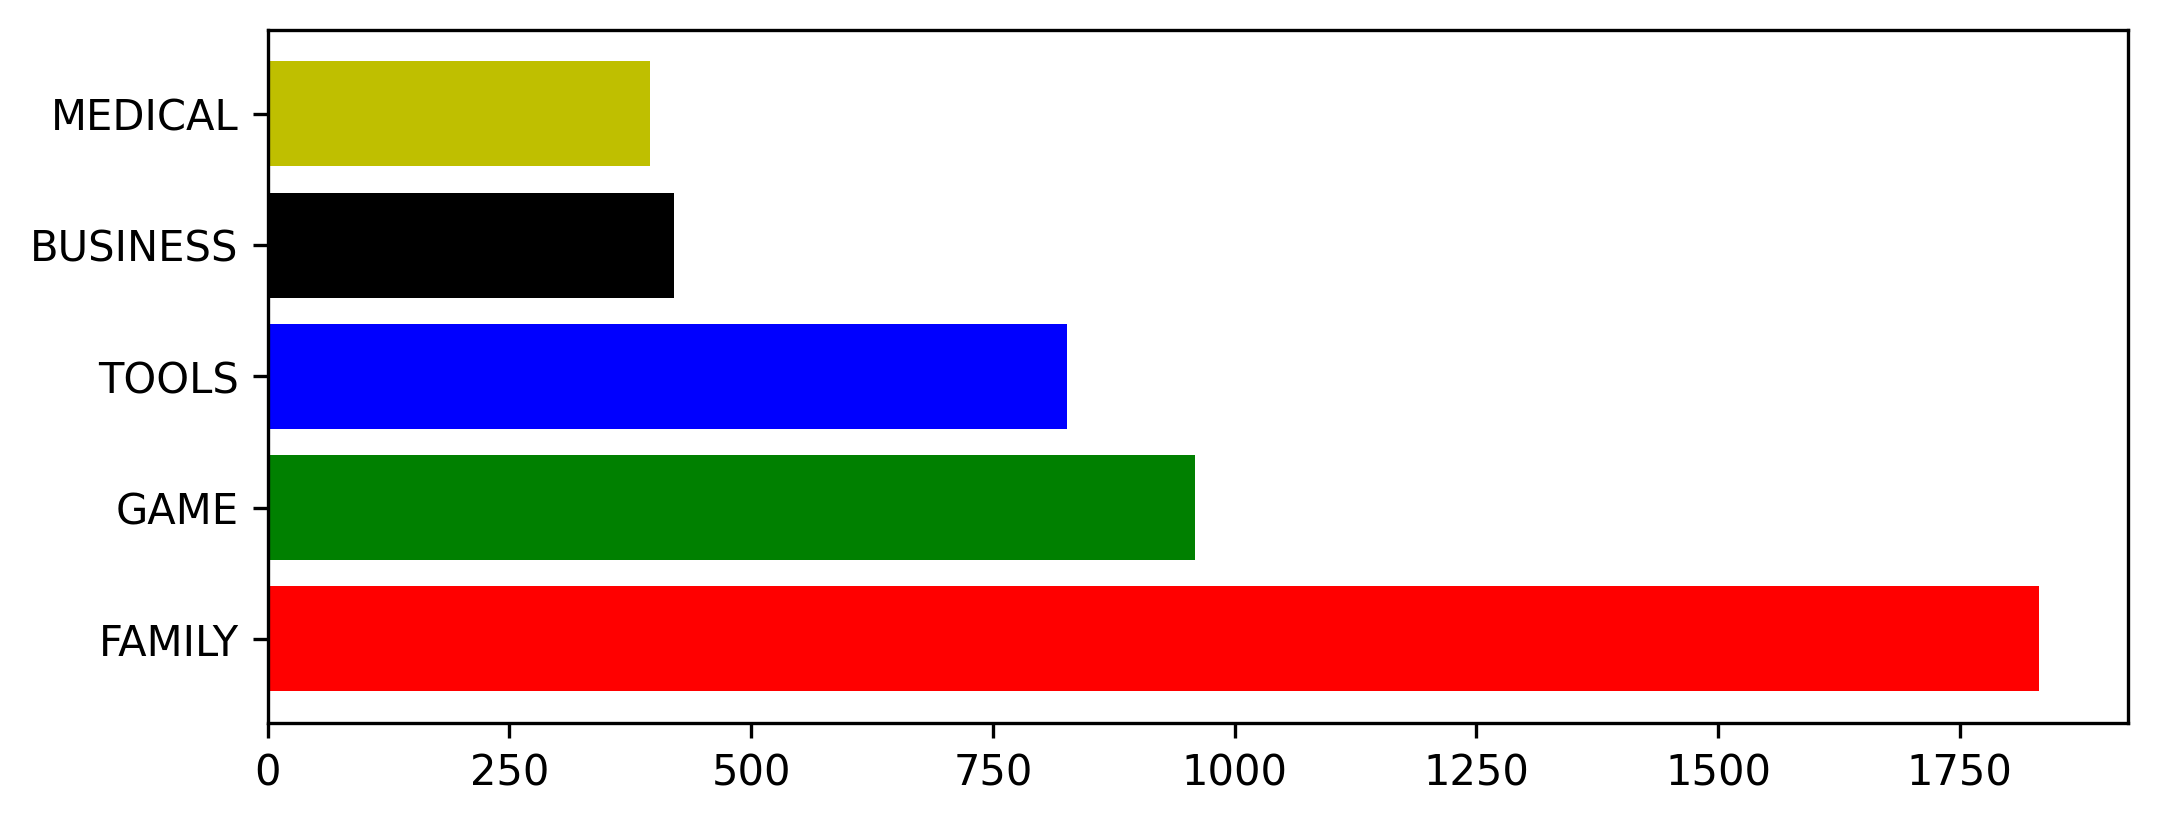

In [32]:
import os
# Tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category
cat_order = df2.groupby('Category').agg({
    'App': 'count'
}).rename({'App':'Total'}, axis=1).sort_values('Total', ascending=False).head()

X = cat_order.index
Y = cat_order['Total']
my_colors = ['r','g','b','k','y','m','c']

# Membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()

# Membuat bar plot
plt.barh(X, Y, color=my_colors)

# Menyimpan plot dalam format image.png
output_folder = "hasilVisualisasi_RENI"
plt.savefig(os.path.join(output_folder, 'cat_order.png'), bbox_inches="tight")

plt.show()

**Membuat Scatter Plot**

**_Task 8:_** Buatlah scatter plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Review vs Rating.
Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi 
    

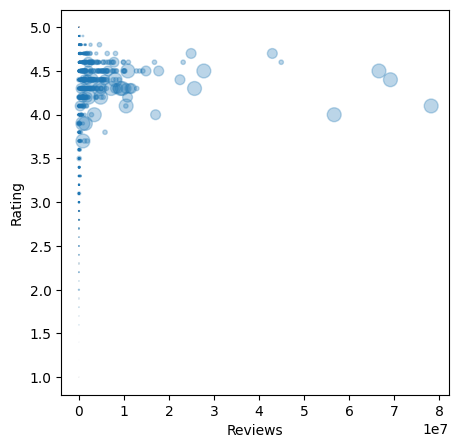

In [33]:
X = df2['Reviews'].values
Y = df2['Rating'].values
area = df2['Installs'].values / 10000000  # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5, 5))
fig.add_subplot()
# Menggunakan method scatter untuk membuat scatter plot
plt.scatter(x=X, y=Y, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')

#plt.savefig('rev_rat.png', bbox_inches="tight")
output_folder = "hasilVisualisasi_RENI"
plt.savefig(os.path.join(output_folder, 'rev_rat.png'), bbox_inches="tight")

plt.show()


**Membuat Histogram Size Distribution**

**_Task 9:_** Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes). Histogram yang terbentuk terbagi menjadi 100 bins

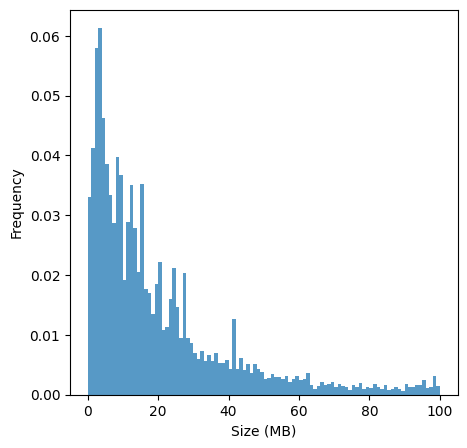

In [34]:
X = (df2['Size'] / 1000000).values
fig = plt.figure(figsize=(5, 5))
fig.add_subplot()
plt.hist(X, bins=100, density=True, alpha=0.75)
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')

#plt.savefig('hist_size.png', bbox_inches="tight")
output_folder = "hasilVisualisasi_RENI"
plt.savefig(os.path.join(output_folder, 'hist_size.png'), bbox_inches="tight")

plt.show()


**_Task 10:_** Buatlah plot berdasarkan hasil analisis anda. Plot yang dibuat tidak diperbolehkan sama dengan plot yang sudah dicontohkan.

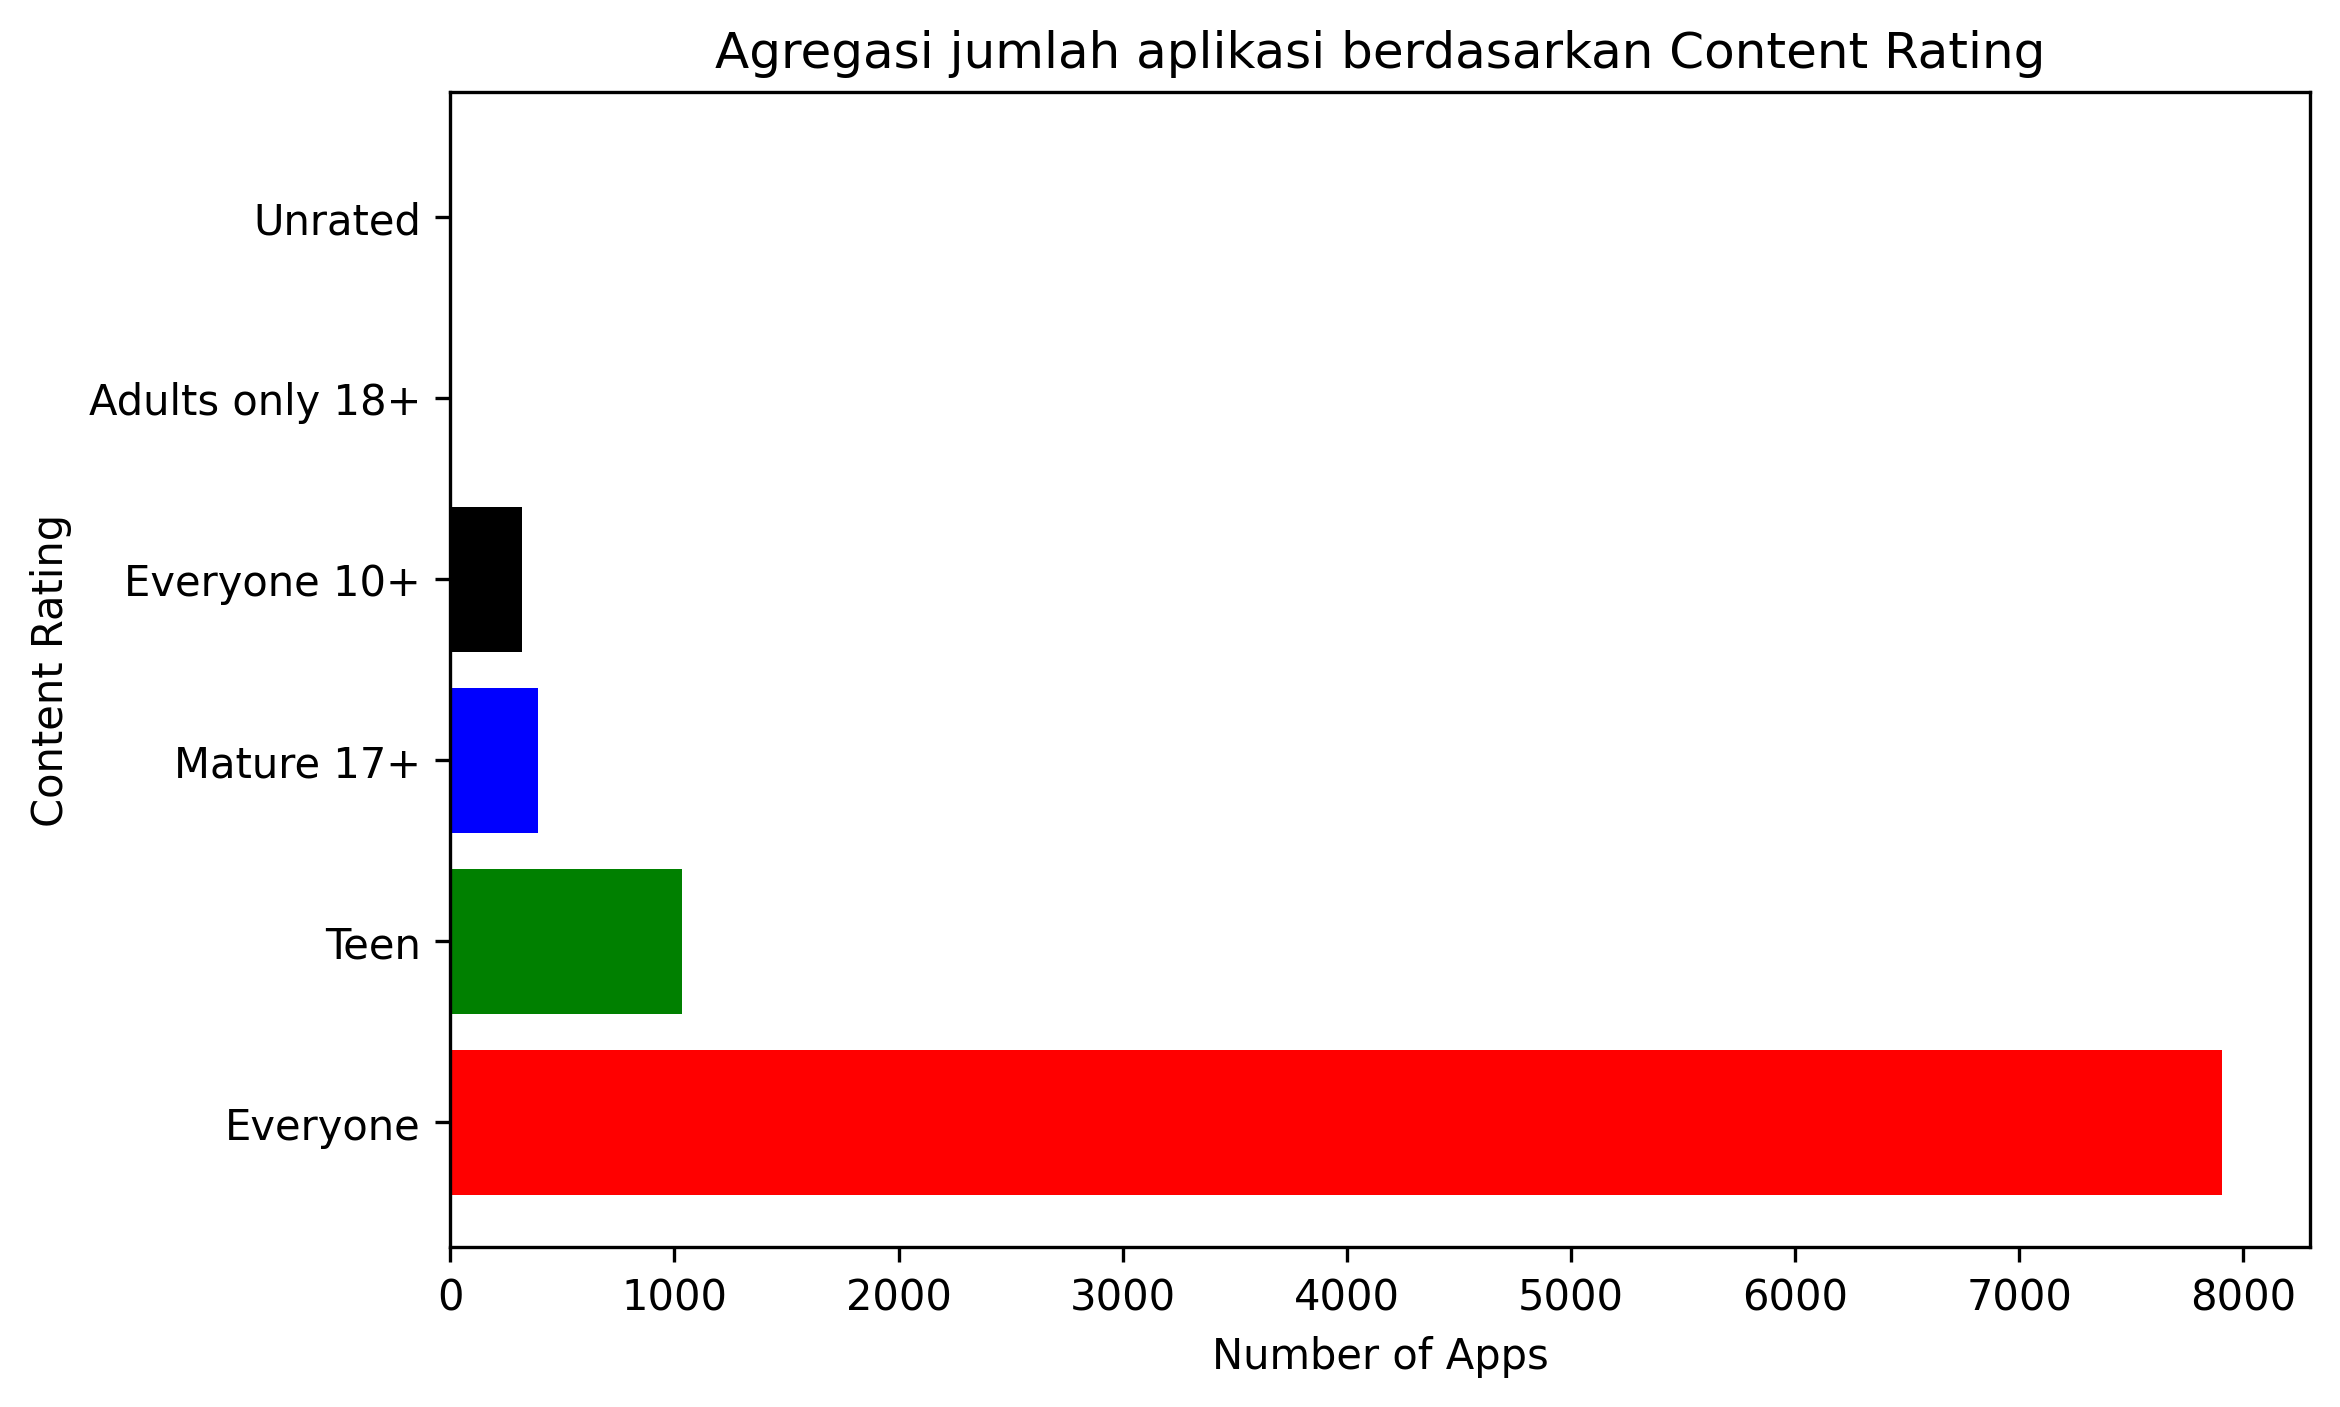

In [35]:
# Agregasi jumlah aplikasi berdasarkan Content Rating
content_order = df2['Content Rating'].value_counts().sort_values(ascending=False)

X = content_order.index
Y = content_order.values
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']

fig = plt.figure(figsize=(8, 5), dpi=300)
fig.add_subplot()

plt.barh(X, Y, color=my_colors)
plt.xlabel('Number of Apps')
plt.ylabel('Content Rating')
plt.title('Agregasi jumlah aplikasi berdasarkan Content Rating')


#plt.savefig('app_distribution_content.png', bbox_inches="tight")
output_folder = "hasilVisualisasi_RENI"
plt.savefig(os.path.join(output_folder, 'app_distribution_content.png'), bbox_inches="tight")

plt.show()


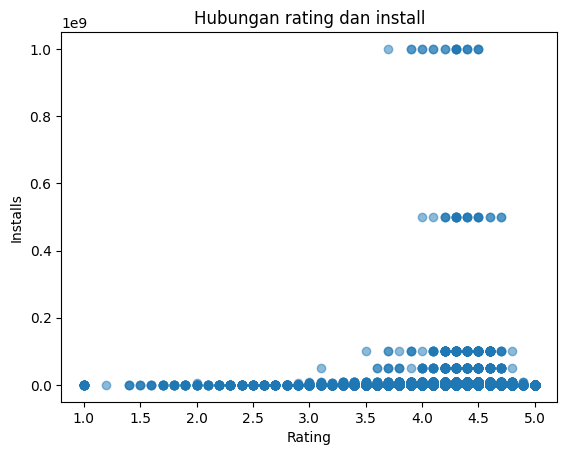

In [36]:
#Hubungan rating dan install
plt.scatter(df2['Rating'], df2['Installs'], alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.title('Hubungan rating dan install')

#plt.savefig('rating_installs.png', bbox_inches="tight")
output_folder = "hasilVisualisasi_RENI"
plt.savefig(os.path.join(output_folder, 'rating_installs.png'), bbox_inches="tight")

plt.show()


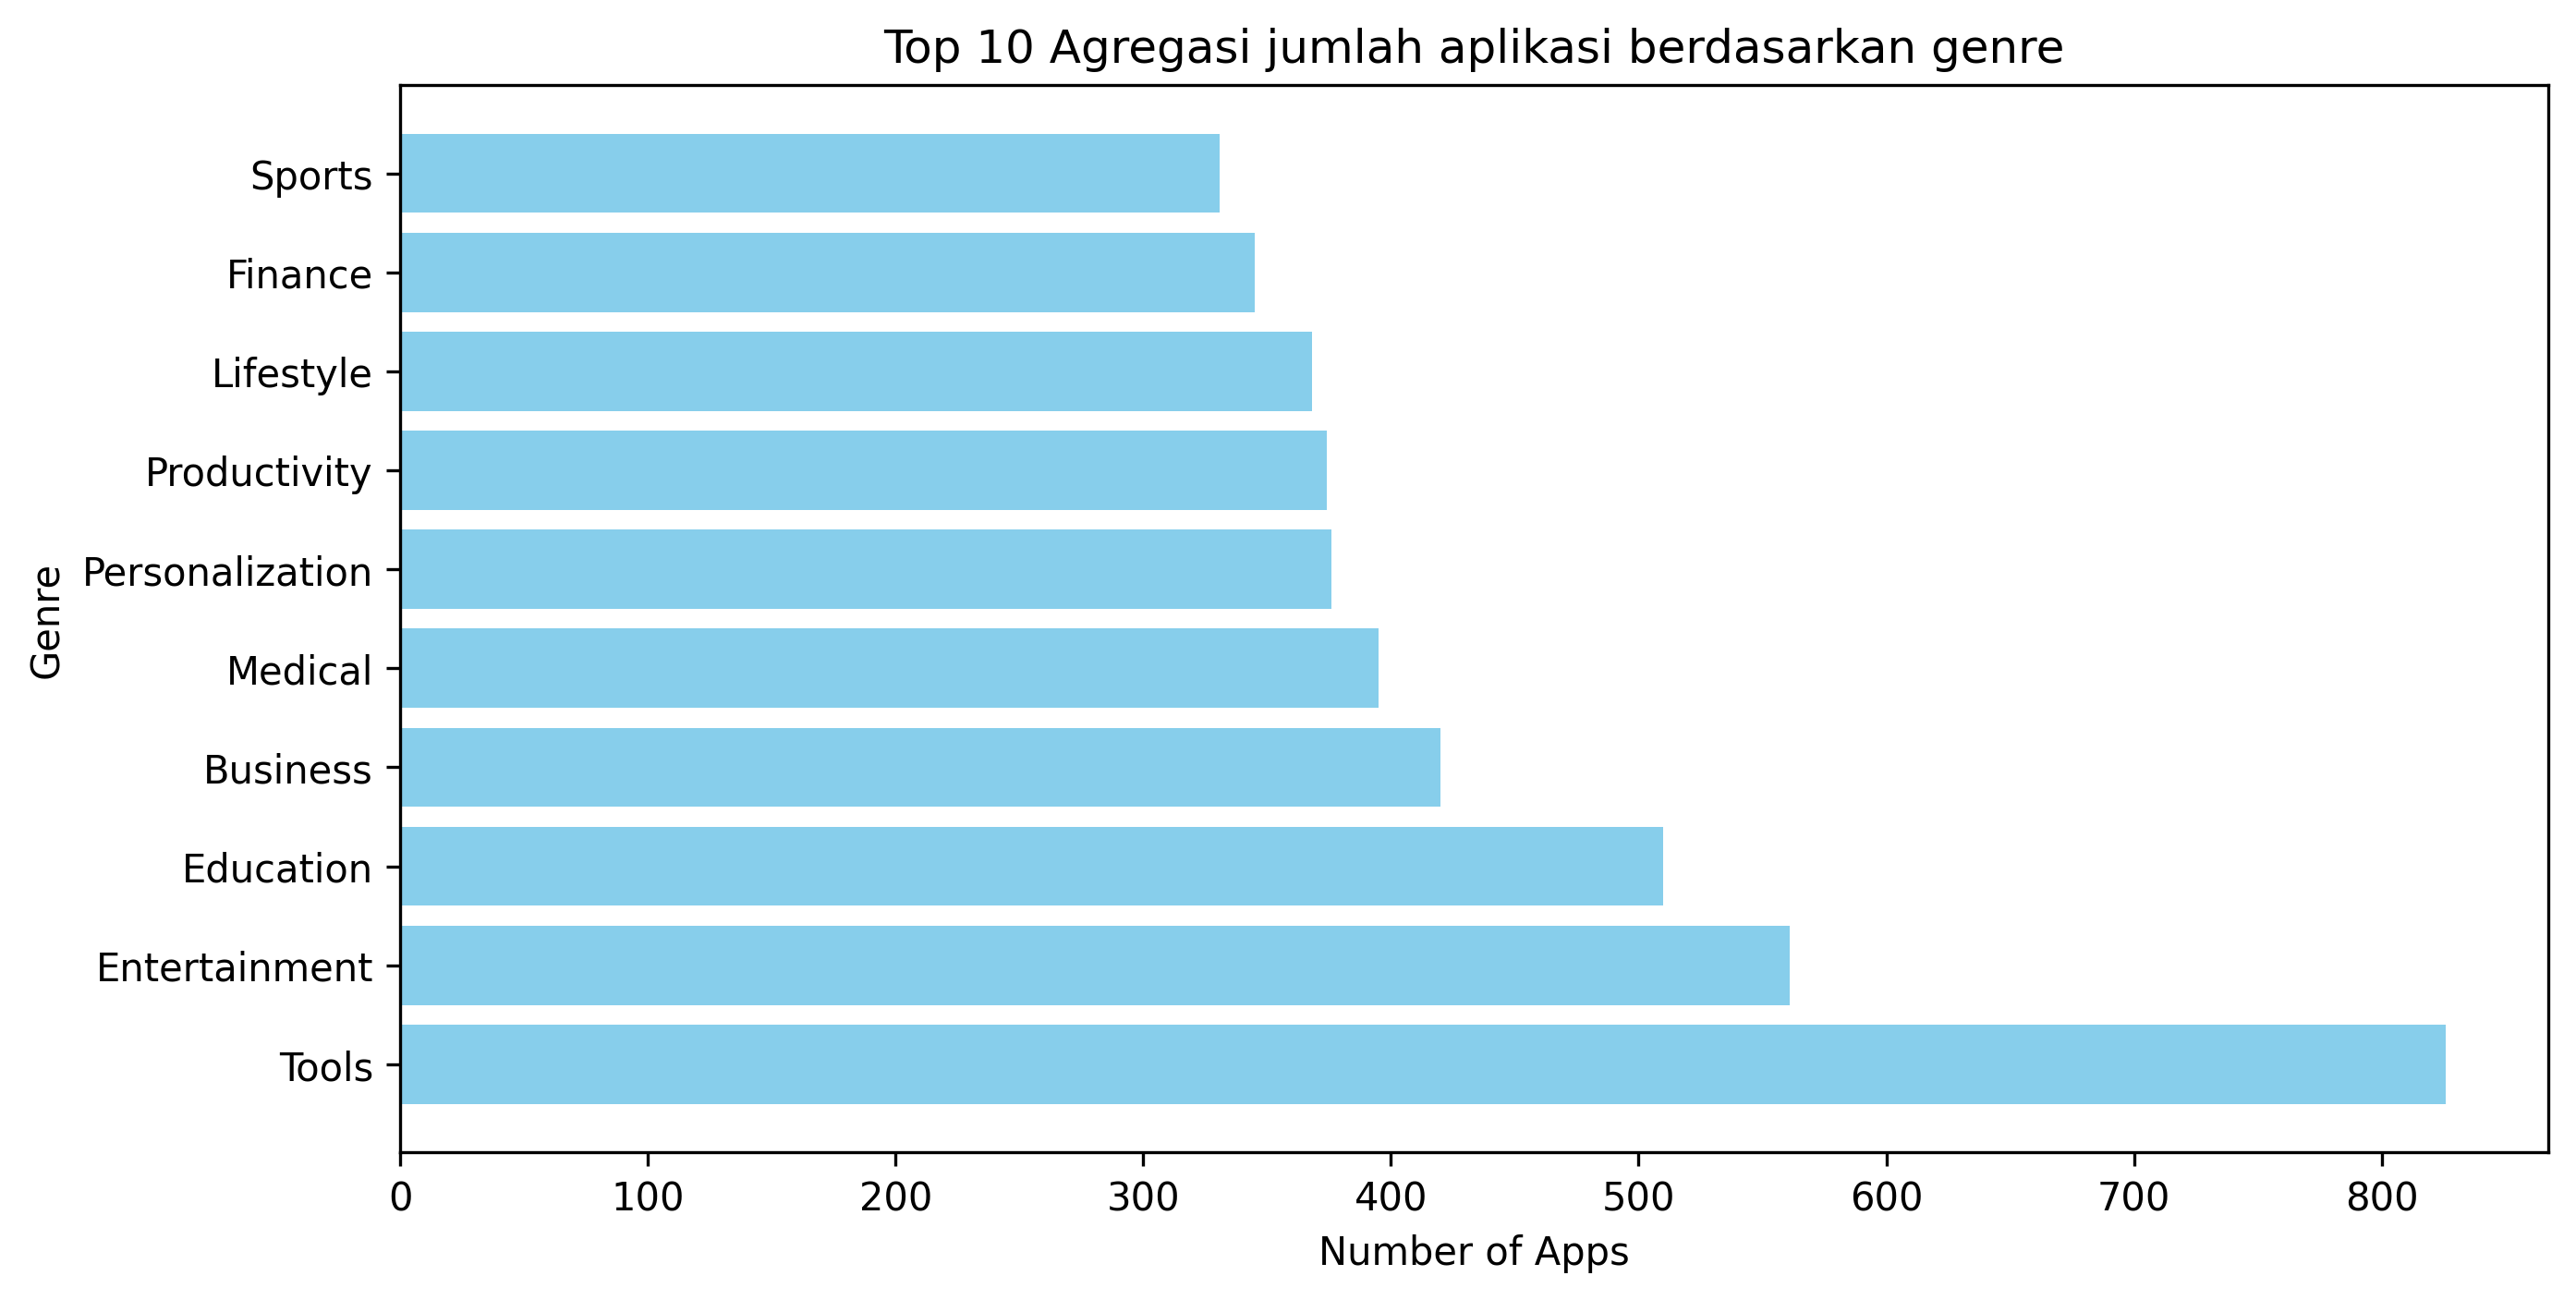

In [37]:
# Agregasi jumlah aplikasi berdasarkan genre
genre_order = df2['Genres'].value_counts().head(10)

X = genre_order.index
Y = genre_order.values

fig = plt.figure(figsize=(10, 5), dpi=300)
fig.add_subplot()

plt.barh(X, Y, color='skyblue')
plt.xlabel('Number of Apps')
plt.ylabel('Genre')
plt.title('Top 10 Agregasi jumlah aplikasi berdasarkan genre')


#plt.savefig('top_10_genres.png', bbox_inches="tight")
output_folder = "hasilVisualisasi_RENI"
plt.savefig(os.path.join(output_folder, 'top_10_genres.png'), bbox_inches="tight")


plt.show()


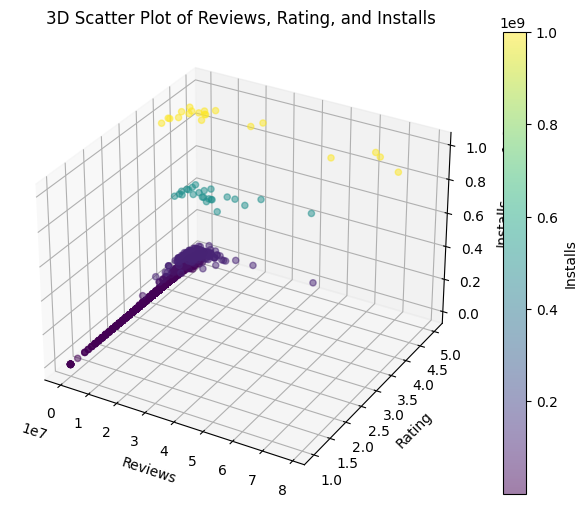

In [38]:
#Mencoba plot 3 dimensi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data yang akan digunakan
X = df2['Reviews'].values
Y = df2['Rating'].values
Z = df2['Installs'].values

# Membuat kanvas/figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Membuat scatter plot 3D
scatter = ax.scatter(X, Y, Z, c=Z, cmap='viridis', marker='o', alpha=0.5)

# Memberi label pada axis
ax.set_xlabel('Reviews')
ax.set_ylabel('Rating')
ax.set_zlabel('Installs')

# Menambahkan colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Installs')

plt.title('3D Scatter Plot of Reviews, Rating, and Installs')


#plt.savefig('scatter_3d.png', bbox_inches='tight')
output_folder = "hasilVisualisasi_RENI"
plt.savefig(os.path.join(output_folder, 'scatter_3d.png'), bbox_inches="tight")

plt.show()


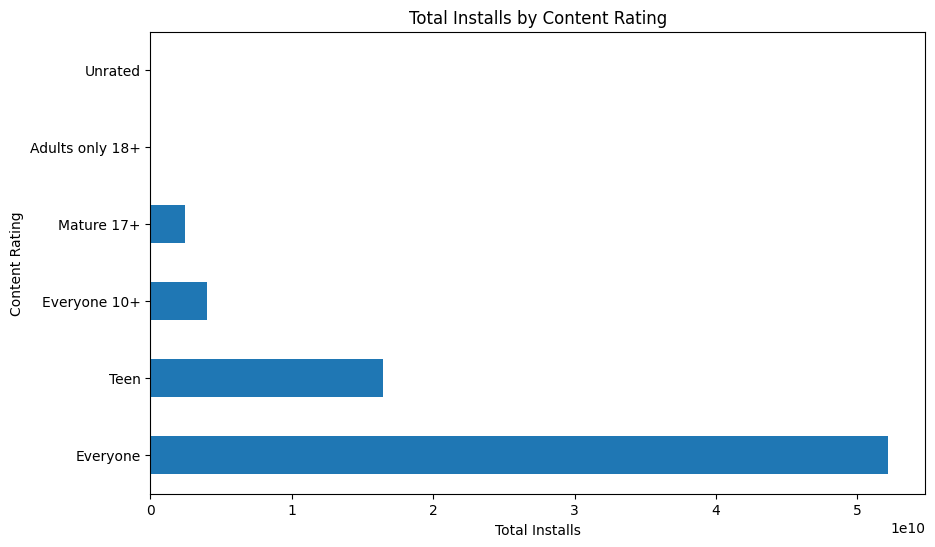

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah instalasi berdasarkan content rating
install_by_rating = df2.groupby('Content Rating')['Installs'].sum()

# Mengurutkan data berdasarkan nilai instalasi
install_by_rating = install_by_rating.sort_values(ascending=False)

# Membuat bar plot dengan urutan terurut
install_by_rating.plot(kind='barh', figsize=(10, 6))

# Memberi label pada axis dan judul plot
plt.xlabel('Total Installs')
plt.ylabel('Content Rating')
plt.title('Total Installs by Content Rating')


#plt.savefig('bar_plot_content_rating_installs_sorted.png', bbox_inches='tight')
output_folder = "hasilVisualisasi_RENI"
plt.savefig(os.path.join(output_folder, 'bar_plot_content_rating_installs_sorted.png'), bbox_inches="tight")

plt.show()


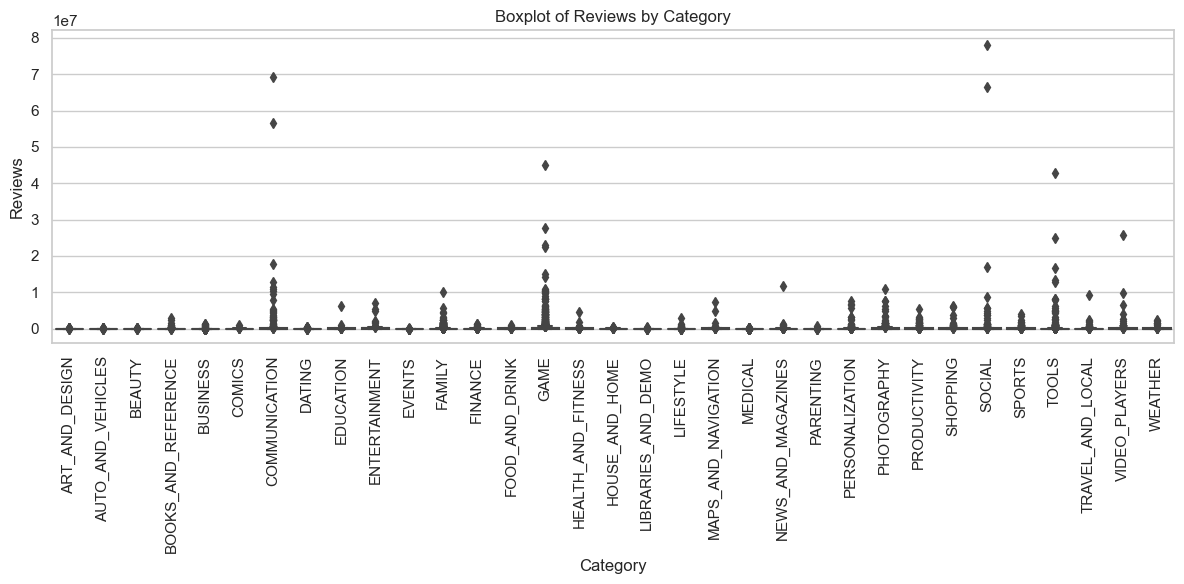

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Reviews', data=df2)
plt.xticks(rotation=90)
plt.title('Boxplot of Reviews by Category')
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.tight_layout()

#plt.savefig(os.path.join(output_folder, 'boxplot_reviews.png'), bbox_inches="tight")
output_folder = "hasilVisualisasi_RENI"
plt.savefig(os.path.join(output_folder, 'boxplot_reviews.png'), bbox_inches="tight")


plt.show()


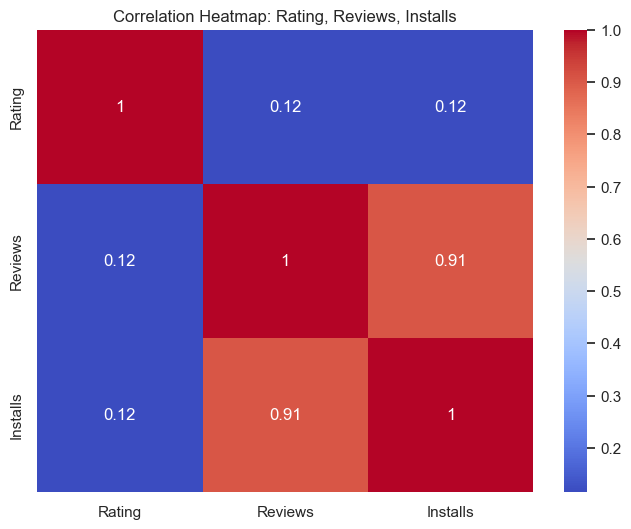

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil subset data untuk visualisasi agar lebih mudah dikelola
subset_data = df2.sample(n=100)  # Ambil 100 data acak

# Heatmap untuk melihat korelasi antara Rating, Reviews, dan Installs
correlation_matrix = subset_data[['Rating', 'Reviews', 'Installs']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Rating, Reviews, Installs')


#plt.savefig('heatmap.png', bbox_inches='tight')
output_folder = "hasilVisualisasi_RENI"
plt.savefig(os.path.join(output_folder, 'heatmap.png'), bbox_inches="tight")
plt.show()

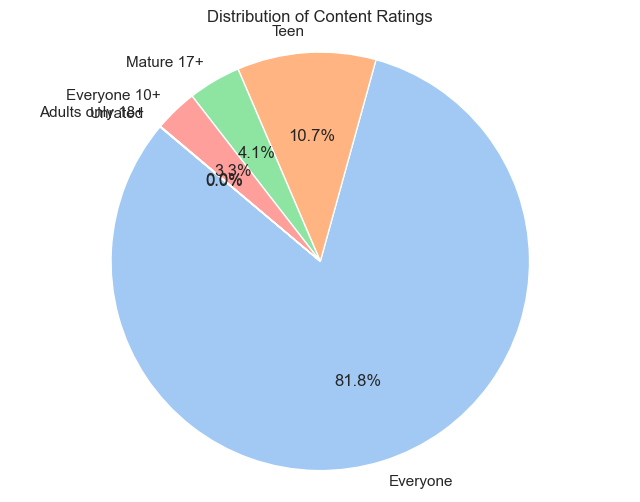

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil subset data untuk visualisasi agar lebih mudah dikelola
subset_data = df2.sample(n=100)  # Ambil 100 data acak


# Pie Chart untuk melihat proporsi Content Rating
content_rating_counts = df2['Content Rating'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(content_rating_counts, labels=content_rating_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Content Ratings')
plt.axis('equal')  # Membuat lingkaran proporsional

#plt.savefig('piechart_content_rating.png', bbox_inches='tight')
output_folder = "hasilVisualisasi_RENI"
plt.savefig(os.path.join(output_folder, 'piechart_content_rating.png'), bbox_inches="tight")
plt.show()

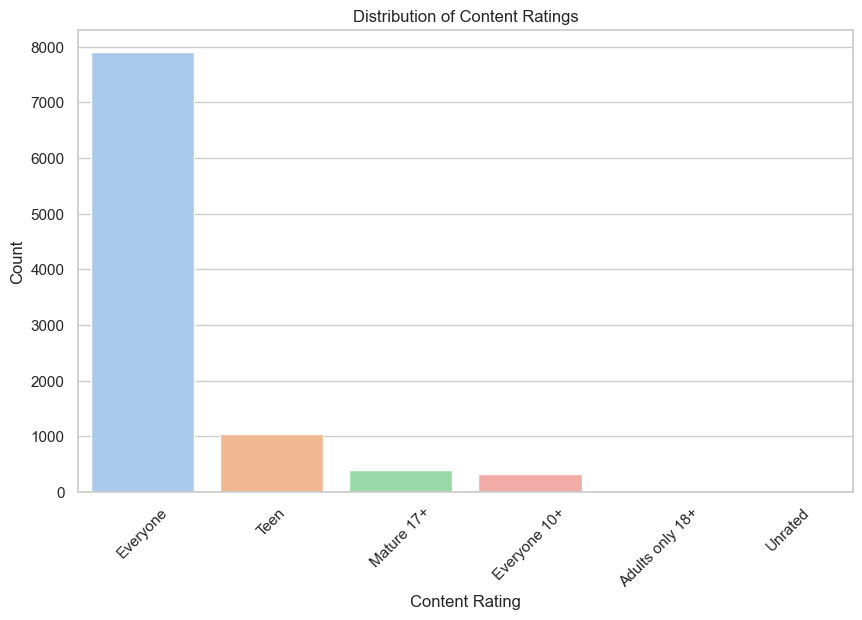

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil subset data untuk visualisasi agar lebih mudah dikelola
subset_data = df2.sample(n=100)  # Ambil 100 data acak

# Bar Plot untuk melihat distribusi Content Rating
content_rating_counts = df2['Content Rating'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=content_rating_counts.index, y=content_rating_counts.values, palette='pastel')
plt.title('Distribution of Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Count')

#plt.savefig(os.path.join(output_folder, 'barplot_content_rating.png'), bbox_inches="tight")
output_folder = "hasilVisualisasi_RENI"
plt.savefig(os.path.join(output_folder, 'barplot_content_rating.png'), bbox_inches="tight")
plt.xticks(rotation=45)
plt.show()

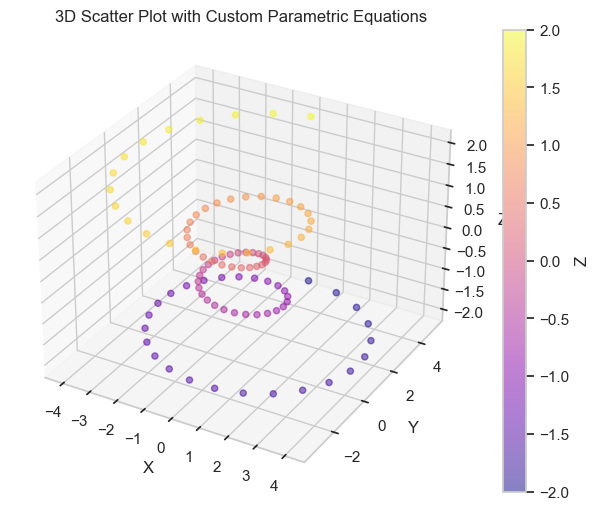

In [44]:
#ini tolong diabaikan, saya lagi eksplore2 saja
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data yang akan digunakan
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

# Membuat kanvas/figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Membuat scatter plot 3D
scatter = ax.scatter(x, y, z, c=z, cmap='plasma', marker='o', alpha=0.5)

# Memberi label pada axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Menambahkan colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Z')

plt.title('3D Scatter Plot with Custom Parametric Equations')

#plt.savefig('scatter_3d_custom.png', bbox_inches='tight')
output_folder = "hasilVisualisasi_RENI"
plt.savefig(os.path.join(output_folder, 'scatter_3d_custom.png'), bbox_inches="tight")

plt.show()
